In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tuik-education-dataset-turkey/TUIK_Education_Dataset.csv
/kaggle/input/tuik-education-dataset-turkey/TUIK_Education_Dataset.xlsx


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('../input/tuik-education-dataset-turkey/TUIK_Education_Dataset.csv')

In [4]:
train.head()

,Year,Education,Sex,Yearly Median Salary (TRY),Yearly Median Salary (USD),Primary School Degree (Age 25 and older) (%),High School Degree (Age 25 and older) (%),College Degree and Higher (Age 25 and older) (%),Population,Median USD/TRY Exchange Rate
0,2008,High School,Female,9219.22,7146.682171,NaN,20.687504,NaN,4221131,1.29
1,2009,High School,Female,9472.15,6111.064516,NaN,21.716939,NaN,4376543,1.55
2,2010,High School,Female,9954.64,6636.426667,NaN,23.582761,NaN,4818017,1.50
3,2011,High School,Female,10492.21,6282.760479,NaN,25.127989,NaN,5024315,1.67
4,2012,High School,Female,11760.08,6569.877095,NaN,26.106466,NaN,5145135,1.79


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              140 non-null    int64  
 1   Education                                         140 non-null    object 
 2   Sex                                               140 non-null    object 
 3   Yearly Median Salary (TRY)                        140 non-null    float64
 4   Yearly Median Salary (USD)                        140 non-null    float64
 5   Primary School Degree (Age 25 and older) (%)      28 non-null     float64
 6   High School Degree (Age 25 and older) (%)         28 non-null     float64
 7   College Degree and Higher (Age 25 and older) (%)  28 non-null     float64
 8   Population                                        140 non-null    int64  
 9   Median USD/TRY Exchan

In [6]:
train.describe()

,Year,Yearly Median Salary (TRY),Yearly Median Salary (USD),Primary School Degree (Age 25 and older) (%),High School Degree (Age 25 and older) (%),College Degree and Higher (Age 25 and older) (%),Population,Median USD/TRY Exchange Rate
count,140.000000,140.000000,140.000000,28.000000,28.000000,28.000000,1.400000e+02,140.000000
mean,2014.500000,18856.860429,6174.968777,87.861064,36.035355,13.933626,5.175278e+06,3.405714
std,4.045603,13962.266328,3834.961112,7.337489,8.736122,4.277388,2.826870e+06,2.275704
min,2008.000000,2657.000000,1714.193548,72.638327,20.687504,7.616578,2.625010e+05,1.290000
25%,2011.000000,9046.415000,3225.037336,81.869615,29.970376,10.126340,3.178508e+06,1.670000
50%,2014.500000,14788.325000,4720.627686,88.516006,36.260145,13.973636,5.108085e+06,2.455000
75%,2018.000000,24942.007500,7556.839532,94.423725,42.521095,17.531813,7.253647e+06,4.810000
max,2021.000000,75359.660000,17699.726320,97.096434,51.865029,20.872866,1.093387e+07,8.910000


In [7]:
train.columns

Index(['Year', 'Education', 'Sex', 'Yearly Median Salary (TRY)',
       'Yearly Median Salary (USD)',
       'Primary School Degree (Age 25 and older) (%)',
       'High School Degree (Age 25 and older) (%)',
       'College Degree and Higher (Age 25 and older) (%)', 'Population',
       'Median USD/TRY Exchange Rate'],
      dtype='object')

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data

<AxesSubplot:>

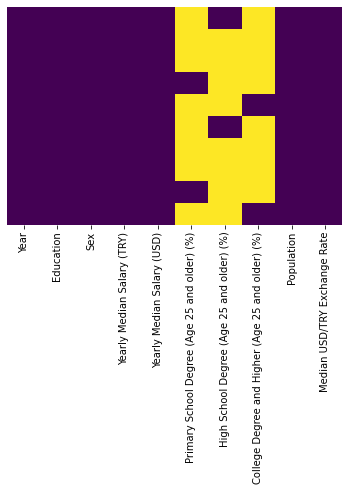

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data Visualisation


<AxesSubplot:>

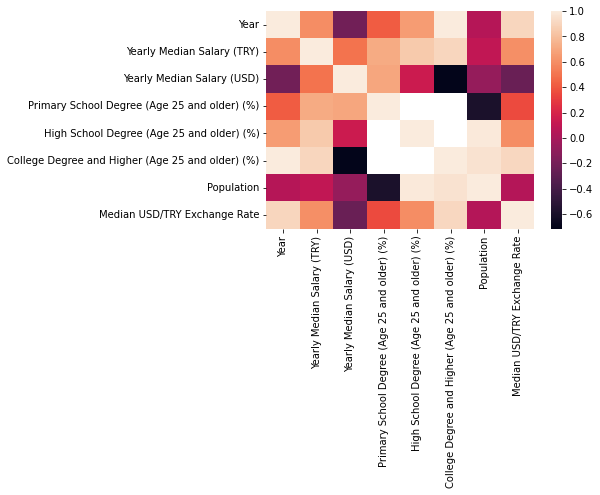

In [9]:
sns.heatmap(train.corr())

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Median Salary (USD)'>

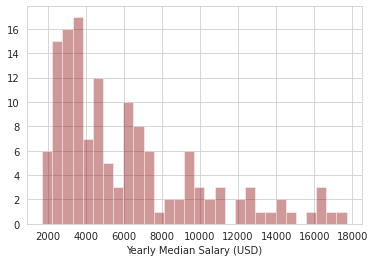

In [10]:
sns.set_style('whitegrid')
sns.distplot(train['Yearly Median Salary (USD)'],kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='Education', ylabel='Yearly Median Salary (USD)'>

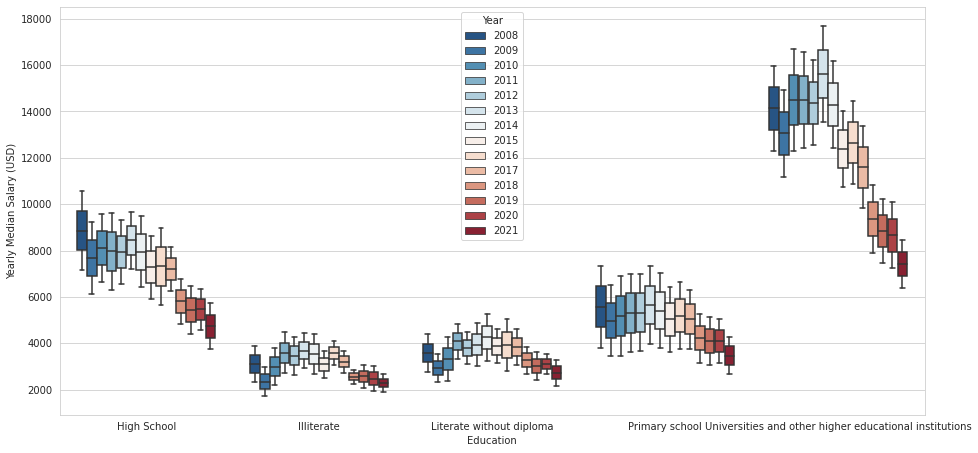

In [11]:
plt.rcParams["figure.figsize"] = [15.50, 7.50]
sns.boxplot(x='Education',y="Yearly Median Salary (USD)",hue='Year',data=train,palette='RdBu_r')